In [3]:
import pandas as pd 
df = pd.read_csv('Speed Dating Data.csv', encoding='latin1')

In [4]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# 目的変数 dec の欠損値を確認

In [11]:
df['dec'].isnull().sum()

np.int64(0)

# 利用するカラムを選定<br>

# 利用するカラムの欠損値を確認

In [16]:
# データの基本情報確認
print("データの形状:", df.shape)
print("\n目的変数 'dec' の値の分布:")
print(df['dec'].value_counts())
print(f"\n目的変数の欠損値数: {df['dec'].isnull().sum()}")

# Speed Dating データで重要そうな特徴量を選定
# 個人の基本情報と最初の印象評価を使用
feature_columns = [
    'age',           # 年齢
    'attr1_1',       # 魅力の重視度
    'sinc1_1',       # 誠実さの重視度  
    'intel1_1',      # 知性の重視度
    'fun1_1',        # 楽しさの重視度
    'amb1_1',        # 野心の重視度
    'shar1_1',       # 共通の興味の重視度
    'attr',          # 相手への魅力評価
    'sinc',          # 相手への誠実さ評価
    'intel',         # 相手への知性評価
    'fun',           # 相手への楽しさ評価
    'amb',           # 相手への野心評価
    'shar'           # 相手との共通の興味評価
]

print(f"\n選定した特徴量数: {len(feature_columns)}")
print("特徴量リスト:", feature_columns)

データの形状: (8378, 195)

目的変数 'dec' の値の分布:
dec
0    4860
1    3518
Name: count, dtype: int64

目的変数の欠損値数: 0

選定した特徴量数: 13
特徴量リスト: ['age', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']


In [18]:
# 選定した特徴量の欠損値を確認
print("=== 各特徴量の欠損値数 ===")
for col in feature_columns:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        missing_pct = (missing_count / len(df)) * 100
        print(f"{col:12s}: {missing_count:5d} ({missing_pct:5.1f}%)")
    else:
        print(f"{col:12s}: カラムが存在しません")

# 欠損値の多い特徴量を除外または対応を検討
print(f"\n総データ数: {len(df)}")

=== 各特徴量の欠損値数 ===
age         :    95 (  1.1%)
attr1_1     :    79 (  0.9%)
sinc1_1     :    79 (  0.9%)
intel1_1    :    79 (  0.9%)
fun1_1      :    89 (  1.1%)
amb1_1      :    99 (  1.2%)
shar1_1     :   121 (  1.4%)
attr        :   202 (  2.4%)
sinc        :   277 (  3.3%)
intel       :   296 (  3.5%)
fun         :   350 (  4.2%)
amb         :   712 (  8.5%)
shar        :  1067 ( 12.7%)

総データ数: 8378


In [19]:
# scikit-learnのライブラリをインポート
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# 目的変数と特徴量の準備
# 目的変数(dec)に欠損値がある行を除外
df_clean = df.dropna(subset=['dec'])
print(f"欠損値除外後のデータ数: {len(df_clean)} (元: {len(df)})")

# 目的変数を準備
y = df_clean['dec'].astype(int)  # 0 or 1に変換
print(f"\n目的変数の分布:")
print(y.value_counts())
print(f"クラス比率 - No(0): {(y==0).mean():.3f}, Yes(1): {(y==1).mean():.3f}")

欠損値除外後のデータ数: 8378 (元: 8378)

目的変数の分布:
dec
0    4860
1    3518
Name: count, dtype: int64
クラス比率 - No(0): 0.580, Yes(1): 0.420


In [20]:
# 特徴量行列の準備
# 存在する特徴量のみを使用
available_features = [col for col in feature_columns if col in df_clean.columns]
print(f"利用可能な特徴量: {len(available_features)}")
print(f"利用可能な特徴量リスト: {available_features}")

# 特徴量行列X を作成
X = df_clean[available_features]
print(f"\n特徴量行列の形状: {X.shape}")

# 各特徴量の欠損値を最終確認
print(f"\n=== 最終的な欠損値状況 ===")
missing_summary = X.isnull().sum()
print(missing_summary[missing_summary > 0])

# scikit-learn 1.6.1は欠損値を自動処理するため、そのまま使用可能
print(f"\n欠損値のある行数: {X.isnull().any(axis=1).sum()}")
print("scikit-learn 1.6.1が欠損値を自動処理します")

利用可能な特徴量: 13
利用可能な特徴量リスト: ['age', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']

特徴量行列の形状: (8378, 13)

=== 最終的な欠損値状況 ===
age           95
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
dtype: int64

欠損値のある行数: 1464
scikit-learn 1.6.1が欠損値を自動処理します


In [21]:
# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20%をテストデータに
    random_state=42,    # 再現性のため
    stratify=y          # クラス比率を保持
)

print("=== データ分割結果 ===")
print(f"訓練データ: {X_train.shape[0]} サンプル")
print(f"テストデータ: {X_test.shape[0]} サンプル")
print(f"特徴量数: {X_train.shape[1]}")

# 訓練データとテストデータのクラス分布を確認
print(f"\n訓練データのクラス分布:")
print(f"  No(0): {(y_train==0).sum()} ({(y_train==0).mean():.3f})")
print(f"  Yes(1): {(y_train==1).sum()} ({(y_train==1).mean():.3f})")

print(f"\nテストデータのクラス分布:")
print(f"  No(0): {(y_test==0).sum()} ({(y_test==0).mean():.3f})")
print(f"  Yes(1): {(y_test==1).sum()} ({(y_test==1).mean():.3f})")

=== データ分割結果 ===
訓練データ: 6702 サンプル
テストデータ: 1676 サンプル
特徴量数: 13

訓練データのクラス分布:
  No(0): 3888 (0.580)
  Yes(1): 2814 (0.420)

テストデータのクラス分布:
  No(0): 972 (0.580)
  Yes(1): 704 (0.420)


In [22]:
# 決定木分類器を作成
clf = DecisionTreeClassifier(
    random_state=42,          # 再現性のため
    max_depth=10,             # 過学習を防ぐため深さを制限
    min_samples_split=20,     # 分割に必要な最小サンプル数
    min_samples_leaf=10,      # 葉ノードの最小サンプル数
    class_weight='balanced'   # クラス不均衡を考慮
)

print("=== 決定木モデルの訓練 ===")
print("モデルパラメータ:")
print(f"  最大深さ: {clf.max_depth}")
print(f"  分割最小サンプル数: {clf.min_samples_split}")
print(f"  葉ノード最小サンプル数: {clf.min_samples_leaf}")
print(f"  クラス重み: {clf.class_weight}")

# モデルを訓練
clf.fit(X_train, y_train)
print("\n✅ モデルの訓練が完了しました！")

=== 決定木モデルの訓練 ===
モデルパラメータ:
  最大深さ: 10
  分割最小サンプル数: 20
  葉ノード最小サンプル数: 10
  クラス重み: balanced

✅ モデルの訓練が完了しました！


In [23]:
# モデルの予測と評価
print("=== モデルの評価 ===")

# 訓練データでの予測
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# テストデータでの予測
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"訓練データの精度: {train_accuracy:.4f}")
print(f"テストデータの精度: {test_accuracy:.4f}")

# 過学習チェック
if train_accuracy - test_accuracy > 0.1:
    print("⚠️  過学習の可能性があります")
else:
    print("✅ 過学習は見られません")

print(f"\n=== 詳細な分類レポート（テストデータ） ===")
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Decision', 'Yes Decision']))

=== モデルの評価 ===
訓練データの精度: 0.8178
テストデータの精度: 0.7363
✅ 過学習は見られません

=== 詳細な分類レポート（テストデータ） ===
              precision    recall  f1-score   support

 No Decision       0.80      0.73      0.76       972
Yes Decision       0.67      0.75      0.70       704

    accuracy                           0.74      1676
   macro avg       0.73      0.74      0.73      1676
weighted avg       0.74      0.74      0.74      1676



In [24]:
# 混同行列の表示
print("=== 混同行列（テストデータ） ===")
cm = confusion_matrix(y_test, y_test_pred)
print("              予測")
print("        No    Yes")
print(f"実際 No  {cm[0,0]:3d}   {cm[0,1]:3d}")
print(f"    Yes  {cm[1,0]:3d}   {cm[1,1]:3d}")

# 特徴量重要度の分析
print(f"\n=== 特徴量重要度 ===")
feature_importance = pd.DataFrame({
    '特徴量': available_features,
    '重要度': clf.feature_importances_
}).sort_values('重要度', ascending=False)

print("上位10個の重要な特徴量:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['特徴量']:12s}: {row['重要度']:.4f}")

# 決定木の基本情報
print(f"\n=== 決定木の構造情報 ===")
print(f"木の深さ: {clf.get_depth()}")
print(f"葉ノード数: {clf.get_n_leaves()}")
print(f"使用された特徴量数: {sum(clf.feature_importances_ > 0)}")

=== 混同行列（テストデータ） ===
              予測
        No    Yes
実際 No  709   263
    Yes  179   525

=== 特徴量重要度 ===
上位10個の重要な特徴量:
 1. attr        : 0.5099
 2. shar        : 0.1061
 3. shar1_1     : 0.0463
 4. fun         : 0.0412
 5. age         : 0.0412
 6. intel1_1    : 0.0411
 7. sinc1_1     : 0.0410
 8. fun1_1      : 0.0399
 9. amb1_1      : 0.0373
10. attr1_1     : 0.0367

=== 決定木の構造情報 ===
木の深さ: 10
葉ノード数: 267
使用された特徴量数: 13


/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:16: UserWarning: Glyph 27770 (\N{CJK UNIFIED IDEOGRAPH-6C7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:16: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:16: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:16: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:16: UserWarning: Glyph 27083 (\N{CJK UNIFIED IDEOGRAPH-69CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5h

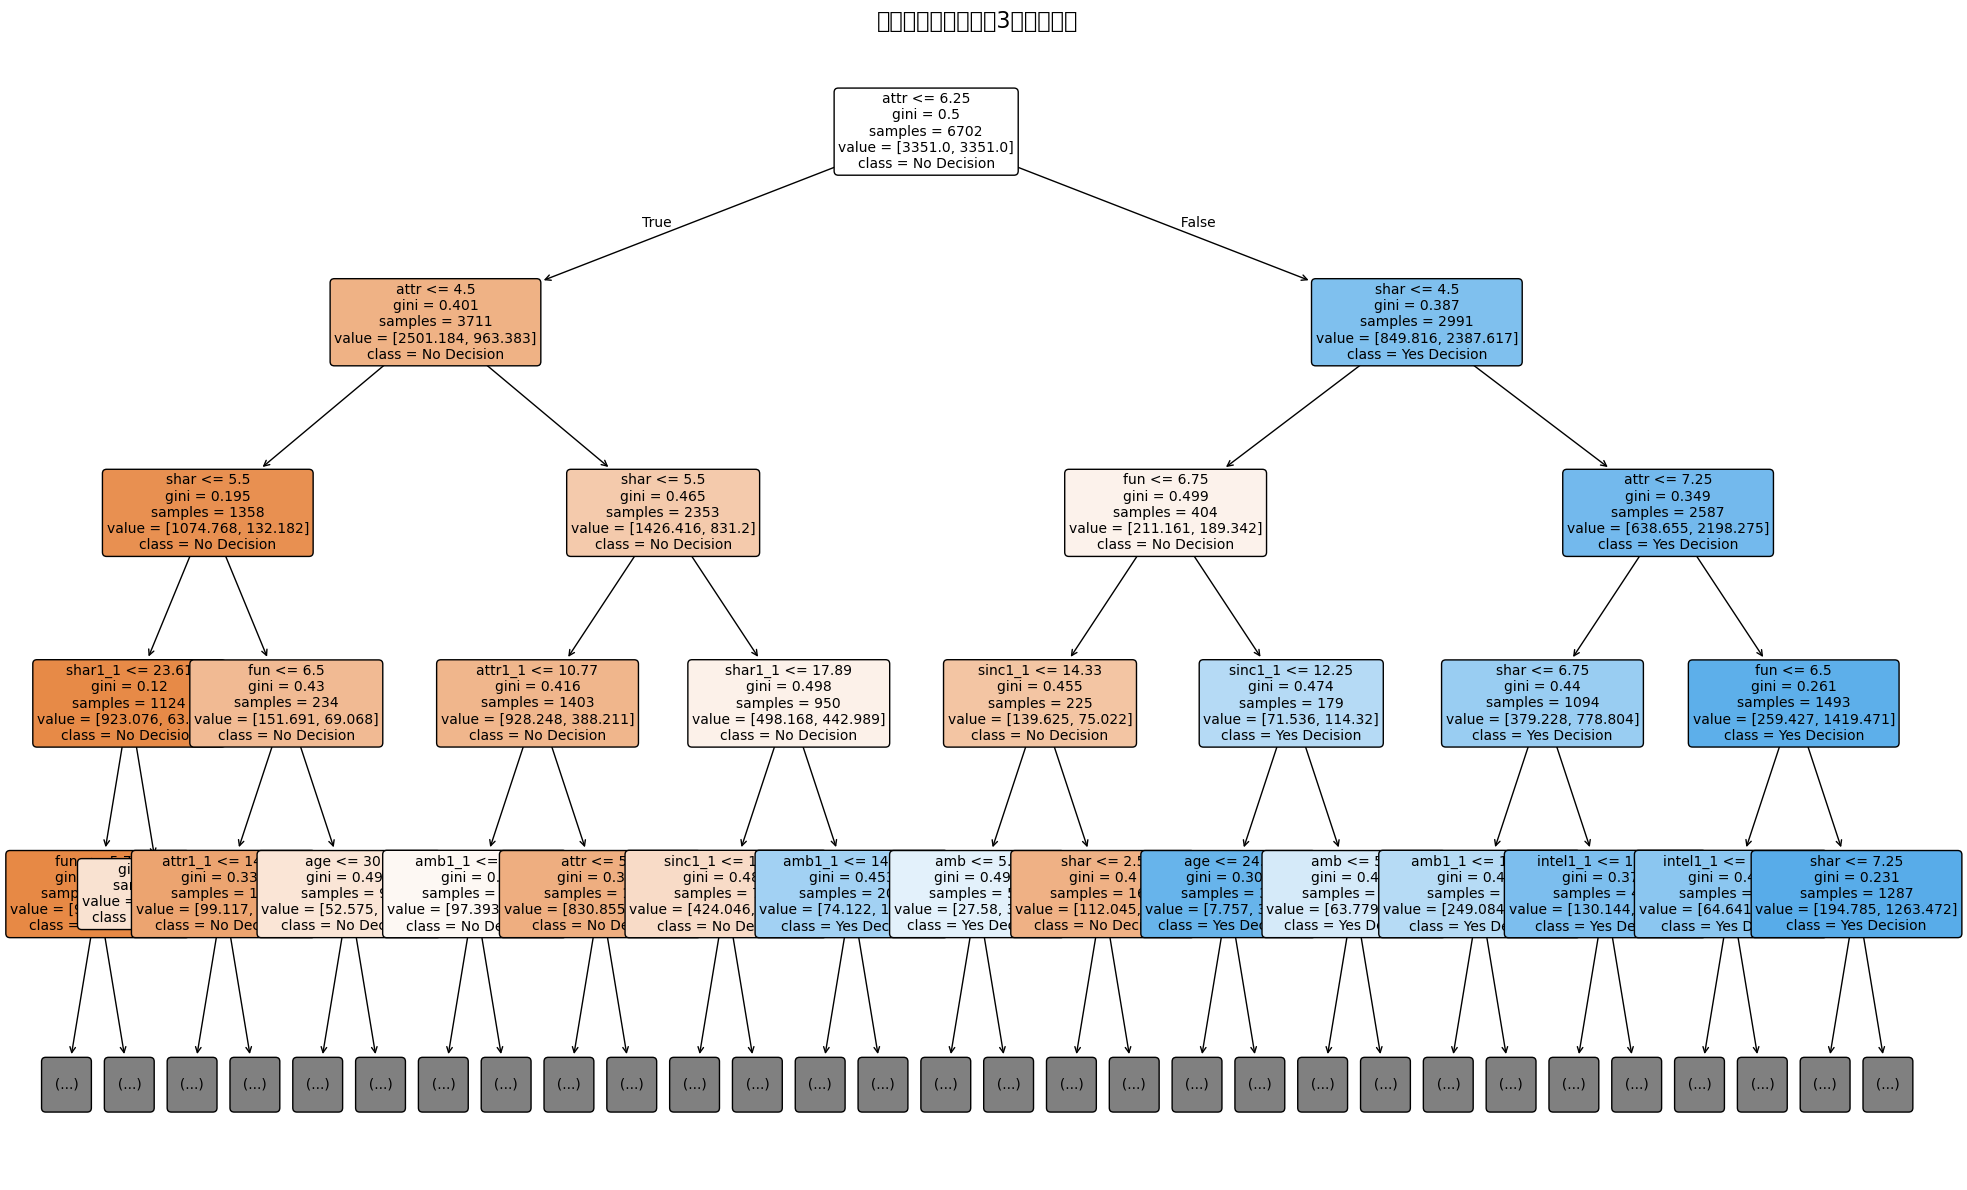

/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:27: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:27: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:27: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:27: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm924xg8jt5hyhqdkf80000gn/T/ipykernel_7720/1240783433.py:27: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/by/dmk1kmm92

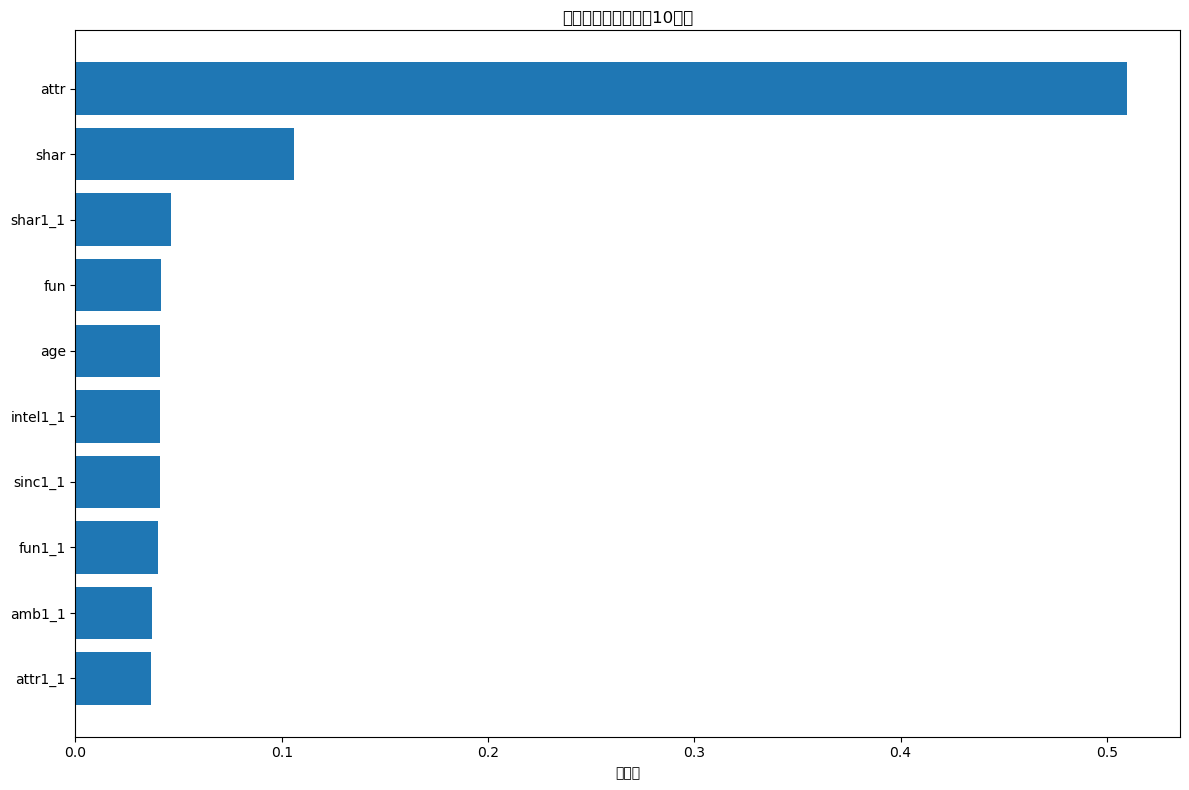

In [28]:
# 決定木の可視化
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 決定木を可視化（深さを制限して見やすくする）
plt.figure(figsize=(20, 12))
plot_tree(clf, 
          max_depth=4,  # 表示する深さを制限
          feature_names=available_features,
          class_names=['No Decision', 'Yes Decision'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title('決定木の構造（深さ3まで表示）', fontsize=16)
plt.tight_layout()
plt.show()

# 重要度の可視化
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['重要度'])
plt.yticks(range(len(top_features)), top_features['特徴量'])
plt.xlabel('重要度')
plt.title('特徴量重要度（上位10個）')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
# 実際の予測例
print("=== 実際の予測例 ===")

# テストデータから数例を選んで予測過程を確認
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test.iloc[sample_indices]
sample_true = y_test.iloc[sample_indices]
sample_pred = clf.predict(sample_data)
sample_proba = clf.predict_proba(sample_data)

for i, idx in enumerate(sample_indices):
    print(f"\n--- サンプル {i+1} ---")
    print(f"実際の結果: {'Yes' if sample_true.iloc[i] == 1 else 'No'}")
    print(f"予測結果: {'Yes' if sample_pred[i] == 1 else 'No'}")
    print(f"予測確率: No={sample_proba[i][0]:.3f}, Yes={sample_proba[i][1]:.3f}")
    
    # 重要な特徴量の値を表示
    print("主要な特徴量の値:")
    for feature in feature_importance.head(5)['特徴量']:
        if not pd.isna(sample_data.iloc[i][feature]):
            print(f"  {feature}: {sample_data.iloc[i][feature]:.2f}")
        else:
            print(f"  {feature}: 欠損値（自動処理済み）")

# モデルの解釈と考察
print("\n" + "="*50)
print("=== モデルの解釈と考察 ===")
print("このSpeed Dating決定木モデルから分かること:")
print("1. 最も重要な特徴量が何であるかを確認")
print("2. 各特徴量がYes/No決定にどう影響するか")
print("3. 決定木の分岐ルールから意思決定パターンを理解")
print("4. 予測精度から実用性を評価")

=== 実際の予測例 ===

--- サンプル 1 ---
実際の結果: No
予測結果: Yes
予測確率: No=0.372, Yes=0.628
主要な特徴量の値:
  attr: 7.00
  shar: 5.00
  shar1_1: 0.00
  fun: 7.00
  age: 25.00

--- サンプル 2 ---
実際の結果: No
予測結果: Yes
予測確率: No=0.153, Yes=0.847
主要な特徴量の値:
  attr: 6.00
  shar: 7.00
  shar1_1: 10.00
  fun: 6.00
  age: 29.00

--- サンプル 3 ---
実際の結果: No
予測結果: No
予測確率: No=0.765, Yes=0.235
主要な特徴量の値:
  attr: 6.00
  shar: 1.00
  shar1_1: 10.00
  fun: 2.00
  age: 30.00

--- サンプル 4 ---
実際の結果: No
予測結果: No
予測確率: No=0.860, Yes=0.140
主要な特徴量の値:
  attr: 5.00
  shar: 3.00
  shar1_1: 10.00
  fun: 4.00
  age: 20.00

--- サンプル 5 ---
実際の結果: No
予測結果: No
予測確率: No=0.591, Yes=0.409
主要な特徴量の値:
  attr: 6.00
  shar: 欠損値（自動処理済み）
  shar1_1: 20.00
  fun: 5.00
  age: 22.00

=== モデルの解釈と考察 ===
このSpeed Dating決定木モデルから分かること:
1. 最も重要な特徴量が何であるかを確認
2. 各特徴量がYes/No決定にどう影響するか
3. 決定木の分岐ルールから意思決定パターンを理解
4. 予測精度から実用性を評価
